In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
# Creating multiple dataframe with different "look back" periods
# The periods are 1 day, 3 days. 7 days. 15 days. 30 days and 60 days
# The look back periods should be in the form of a list
# For example, if the look back period is 3, then the dataframe should have 3 columns
# Date, Close, [Close(t-1), Close(t-2), Close(t-3)]

def create_look_back_arrays(df, window_size = 1):
    df = df.drop(columns = ['Date'])
    df_as_np = df.to_numpy()
    X = []
    Y = []
    for i in range(len(df_as_np) - window_size):
        X.append(df_as_np[i:i+window_size])
        Y.append(df_as_np[i+window_size])
    return np.array(X), np.array(Y)

In [3]:
df = pd.read_csv('../Data/bitcoin_data.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3174,2023-05-27,26720.181641,26888.882812,26621.140625,26868.353516,26868.353516,7892015141
3175,2023-05-28,26871.158203,28193.449219,26802.751953,28085.646484,28085.646484,14545229578
3176,2023-05-29,28075.591797,28432.039062,27563.876953,27745.884766,27745.884766,15181308984
3177,2023-05-30,27745.123047,28044.759766,27588.501953,27702.349609,27702.349609,13251081851


In [5]:
df = df[['Date', 'Close']]

In [6]:
df

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3174,2023-05-27,26868.353516
3175,2023-05-28,28085.646484
3176,2023-05-29,27745.884766
3177,2023-05-30,27702.349609


In [7]:
# Scale the values in the Close column
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

/var/folders/76/w363ly_90ln6pf3txlrc64bw0000gn/T/ipykernel_70001/3875126601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df[['Close']])


In [8]:
df

,Date,Close
0,2014-09-17,0.004144
1,2014-09-18,0.003655
2,2014-09-19,0.003216
3,2014-09-20,0.003425
4,2014-09-21,0.003275
...,...,...
3174,2023-05-27,0.396064
3175,2023-05-28,0.414128
3176,2023-05-29,0.409086
3177,2023-05-30,0.408440


In [9]:
x_1, y_1 = create_look_back_arrays(df, 1)
x_3, y_3 = create_look_back_arrays(df, 3)
x_7, y_7 = create_look_back_arrays(df, 7)
x_15, y_15 = create_look_back_arrays(df, 15)
x_30, y_30 = create_look_back_arrays(df, 30)
x_60, y_60 = create_look_back_arrays(df, 60)

# 1 Day look back window

In [10]:
x_1.shape, y_1.shape

((3178, 1, 1), (3178, 1))

In [11]:
X_1_train, y_1_train = x_1[:int(0.8*len(x_1))], y_1[:int(0.8*len(x_1))]
X_1_val, y_1_val = x_1[int(0.8*len(x_1)):int(0.9*len(x_1))], y_1[int(0.8*len(x_1)):int(0.9*len(x_1))]
X_1_test, y_1_test = x_1[int(0.9*len(x_1)):], y_1[int(0.9*len(x_1)):]
X_1_train.shape, y_1_train.shape, X_1_val.shape, y_1_val.shape, X_1_test.shape, y_1_test.shape

((2542, 1, 1), (2542, 1), (318, 1, 1), (318, 1), (318, 1, 1), (318, 1))

In [12]:
model_1 = Sequential()
model_1.add(InputLayer(input_shape = (1, 1)))
model_1.add(LSTM(64,))
model_1.add(Dense(8, activation = 'relu'))
model_1.add(Dense(1, activation = 'linear'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
cp = ModelCheckpoint('models/lstm_1.h5', save_best_only = True)
model_1.compile(optimizer = Adam(learning_rate = 0.0001), loss = MeanSquaredError(), metrics = [RootMeanSquaredError(), MeanAbsoluteError()])

In [14]:
model_1.fit(X_1_train, y_1_train, epochs = 200, validation_data = (X_1_val, y_1_val), callbacks = [cp])

Epoch 1/200
80/80 [==============================] - 1s 5ms/step - loss: 0.0434 - root_mean_squared_error: 0.2084 - mean_absolute_error: 0.1131 - val_loss: 0.3244 - val_root_mean_squared_error: 0.5696 - val_mean_absolute_error: 0.5457
Epoch 2/200
80/80 [==============================] - 0s 1ms/step - loss: 0.0348 - root_mean_squared_error: 0.1865 - mean_absolute_error: 0.1024 - val_loss: 0.2681 - val_root_mean_squared_error: 0.5177 - val_mean_absolute_error: 0.4934
Epoch 3/200
53/80 [==================>...........] - ETA: 0s - loss: 0.0278 - root_mean_squared_error: 0.1668 - mean_absolute_error: 0.0938

/opt/miniconda3/envs/eth/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


80/80 [==============================] - 0s 1ms/step - loss: 0.0291 - root_mean_squared_error: 0.1707 - mean_absolute_error: 0.0970 - val_loss: 0.2238 - val_root_mean_squared_error: 0.4730 - val_mean_absolute_error: 0.4485
Epoch 4/200
80/80 [==============================] - 0s 1ms/step - loss: 0.0255 - root_mean_squared_error: 0.1596 - mean_absolute_error: 0.0949 - val_loss: 0.1905 - val_root_mean_squared_error: 0.4365 - val_mean_absolute_error: 0.4124
Epoch 5/200
80/80 [==============================] - 0s 1ms/step - loss: 0.0227 - root_mean_squared_error: 0.1506 - mean_absolute_error: 0.0930 - val_loss: 0.1622 - val_root_mean_squared_error: 0.4028 - val_mean_absolute_error: 0.3794
Epoch 6/200
80/80 [==============================] - 0s 1ms/step - loss: 0.0202 - root_mean_squared_error: 0.1421 - mean_absolute_error: 0.0901 - val_loss: 0.1416 - val_root_mean_squared_error: 0.3763 - val_mean_absolute_error: 0.3541
Epoch 7/200
80/80 [==============================] - 0s 1ms/step - loss:

In [15]:
model_1 = load_model('models/lstm_1.h5')

In [16]:
test_1_predictions = model_1.predict(X_1_test)
test_results = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': test_1_predictions.flatten()})
test_results

10/10 [==============================] - 0s 681us/step


,Actual,Predicted
0,0.331028,0.301586
1,0.344439,0.327019
2,0.342099,0.340534
3,0.341103,0.338174
4,0.334431,0.337170
...,...,...
313,0.396064,0.390595
314,0.414128,0.392845
315,0.409086,0.411254
316,0.408440,0.406110


In [17]:
# Creating a dataframe with the actual and predicted values without the scaling 
test_results_unscaled = pd.DataFrame({'Actual': scaler.inverse_transform(y_1_test).flatten(), 'Predicted': scaler.inverse_transform(test_1_predictions).flatten()})
test_results_unscaled

,Actual,Predicted
0,22485.689453,20501.609375
1,23389.433594,22215.515625
2,23231.732422,23126.287109
3,23164.628906,22967.212891
4,22714.978516,22899.544922
...,...,...
313,26868.353516,26499.773438
314,28085.646484,26651.431641
315,27745.884766,27891.957031
316,27702.349609,27545.343750


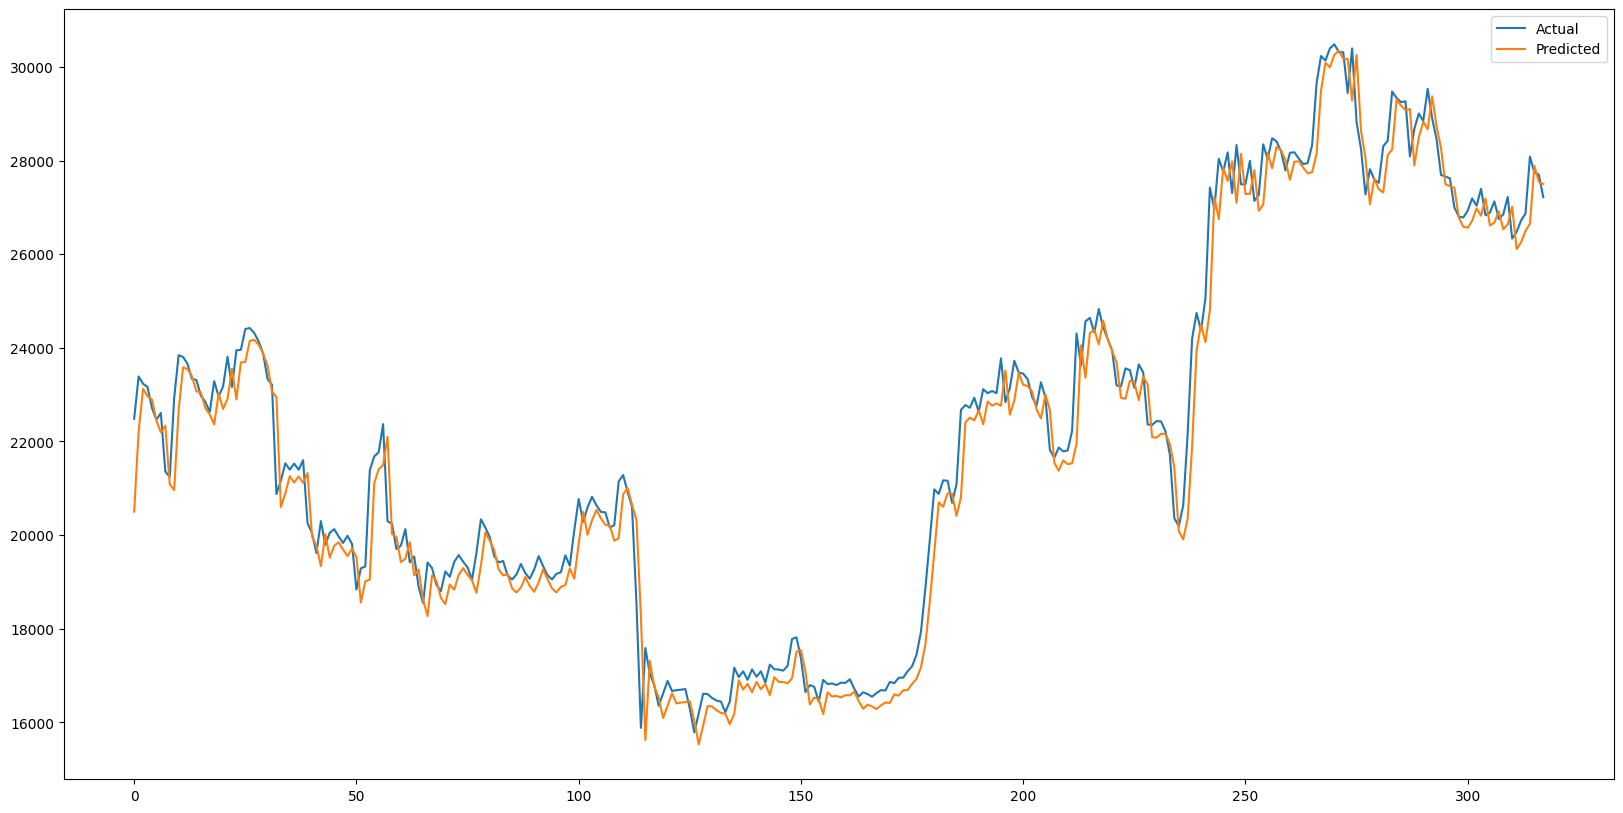

In [18]:
# Plotting the actual and predicted values
plt.figure(figsize = (20, 10))
plt.plot(test_results_unscaled['Actual'], label = 'Actual')
plt.plot(test_results_unscaled['Predicted'], label = 'Predicted')
plt.legend()

In [19]:
# Calculating the RMSE and MAE
rmse = np.sqrt(np.mean((test_results_unscaled['Actual'] - test_results_unscaled['Predicted'])**2))
mae = np.mean(np.abs(test_results_unscaled['Actual'] - test_results_unscaled['Predicted']))
rmse, mae

(664.6599314011178, 469.19243808962267)

# 3 Day Look Back Window

In [20]:
x_3.shape, y_3.shape

((3176, 3, 1), (3176, 1))

In [21]:
X_3_train, y_3_train = x_3[:int(0.8*len(x_3))], y_3[:int(0.8*len(x_3))]
X_3_val, y_3_val = x_3[int(0.8*len(x_3)):int(0.9*len(x_3))], y_3[int(0.8*len(x_3)):int(0.9*len(x_3))]
X_3_test, y_3_test = x_3[int(0.9*len(x_3)):], y_3[int(0.9*len(x_3)):]
X_3_train.shape, y_3_train.shape, X_3_val.shape, y_3_val.shape, X_3_test.shape, y_3_test.shape

((2540, 3, 1), (2540, 1), (318, 3, 1), (318, 1), (318, 3, 1), (318, 1))

In [22]:
model_3 = Sequential()
model_3.add(InputLayer(input_shape = (3, 1)))
model_3.add(LSTM(64))
model_3.add(Dense(8, activation = 'relu'))
model_3.add(Dense(1, activation = 'linear'))

model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
cp3 = ModelCheckpoint('models/lstm_3.h5', save_best_only = True)
model_3.compile(optimizer = Adam(learning_rate = 0.0001), loss = MeanSquaredError(), metrics = [RootMeanSquaredError(), MeanAbsoluteError()])

In [24]:
model_3.fit(X_3_train, y_3_train, epochs = 200, validation_data = (X_3_val, y_3_val), callbacks = [cp3])

Epoch 1/200
80/80 [==============================] - 1s 3ms/step - loss: 0.0426 - root_mean_squared_error: 0.2065 - mean_absolute_error: 0.1120 - val_loss: 0.2979 - val_root_mean_squared_error: 0.5458 - val_mean_absolute_error: 0.5225
Epoch 2/200
80/80 [==============================] - 0s 1ms/step - loss: 0.0300 - root_mean_squared_error: 0.1733 - mean_absolute_error: 0.0952 - val_loss: 0.2093 - val_root_mean_squared_error: 0.4575 - val_mean_absolute_error: 0.4348
Epoch 3/200
48/80 [=================>............] - ETA: 0s - loss: 0.0224 - root_mean_squared_error: 0.1495 - mean_absolute_error: 0.0872

/opt/miniconda3/envs/eth/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


80/80 [==============================] - 0s 1ms/step - loss: 0.0209 - root_mean_squared_error: 0.1447 - mean_absolute_error: 0.0852 - val_loss: 0.1321 - val_root_mean_squared_error: 0.3635 - val_mean_absolute_error: 0.3426
Epoch 4/200
80/80 [==============================] - 0s 1ms/step - loss: 0.0142 - root_mean_squared_error: 0.1190 - mean_absolute_error: 0.0769 - val_loss: 0.0778 - val_root_mean_squared_error: 0.2790 - val_mean_absolute_error: 0.2614
Epoch 5/200
80/80 [==============================] - 0s 1ms/step - loss: 0.0085 - root_mean_squared_error: 0.0921 - mean_absolute_error: 0.0630 - val_loss: 0.0378 - val_root_mean_squared_error: 0.1945 - val_mean_absolute_error: 0.1813
Epoch 6/200
80/80 [==============================] - 0s 1ms/step - loss: 0.0039 - root_mean_squared_error: 0.0627 - mean_absolute_error: 0.0437 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1093 - val_mean_absolute_error: 0.0997
Epoch 7/200
80/80 [==============================] - 0s 1ms/step - loss:

In [25]:
model_3 = load_model('models/lstm_3.h5')

In [26]:
test_3_predictions = model_3.predict(X_3_test)
test_3_results = pd.DataFrame({'Actual': y_3_test.flatten(), 'Predicted': test_3_predictions.flatten()})
test_3_results

10/10 [==============================] - 0s 572us/step


,Actual,Predicted
0,0.331028,0.312562
1,0.344439,0.321136
2,0.342099,0.332899
3,0.341103,0.345822
4,0.334431,0.349339
...,...,...
313,0.396064,0.401282
314,0.414128,0.404154
315,0.409086,0.412726
316,0.408440,0.418304


In [27]:
# Creating a dataframe with the actual and predicted values without the scaling
test_3_results_unscaled = pd.DataFrame({'Actual': scaler.inverse_transform(y_3_test).flatten(), 'Predicted': scaler.inverse_transform(test_3_predictions).flatten()})

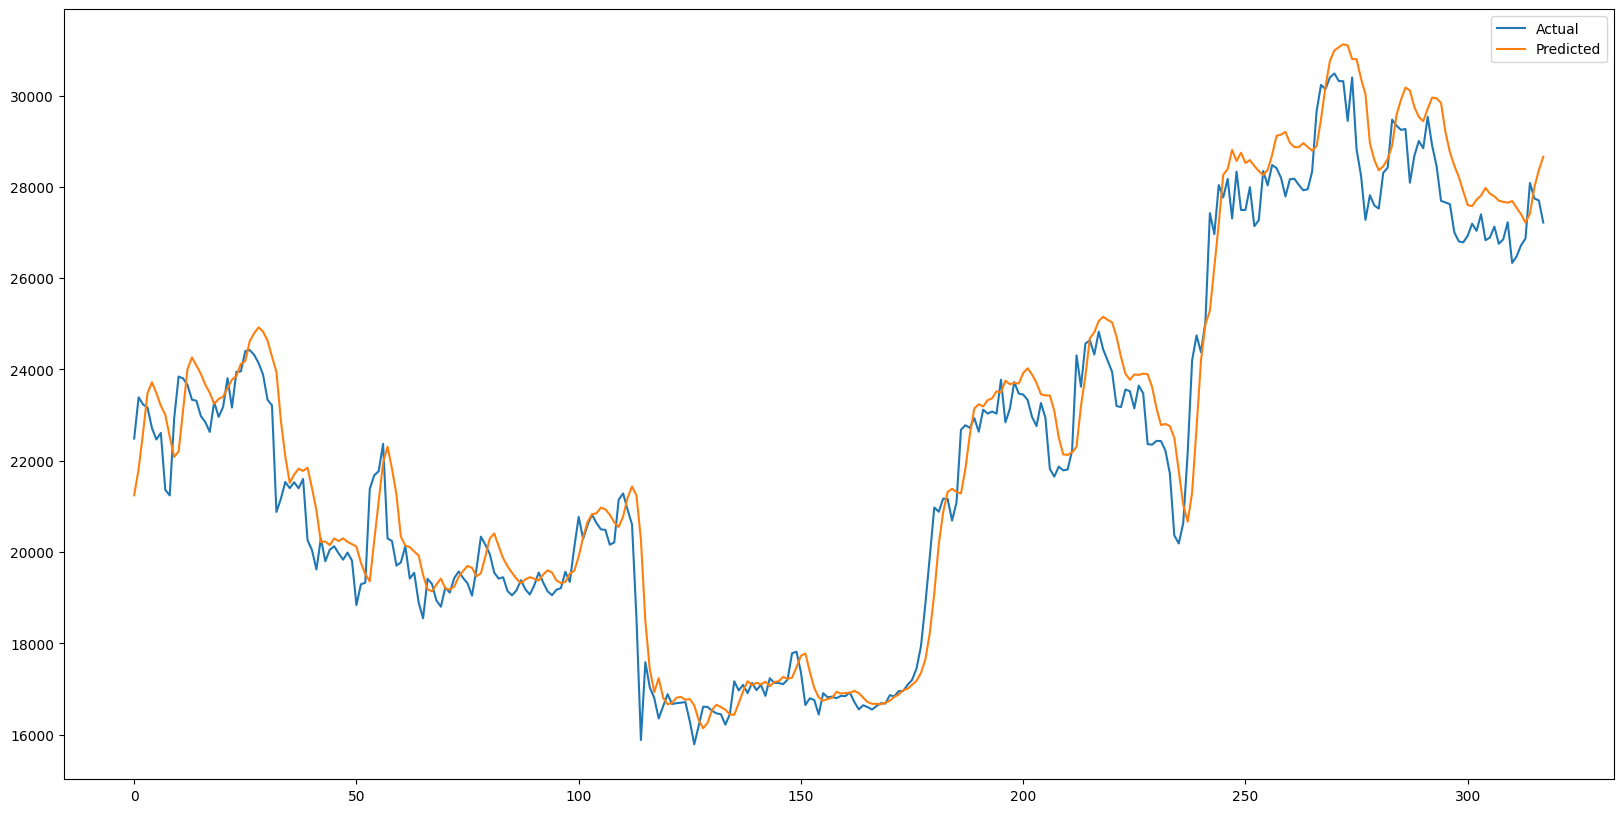

In [28]:
# Plotting the actual and predicted values
plt.figure(figsize = (20, 10))
plt.plot(test_3_results_unscaled['Actual'], label = 'Actual')
plt.plot(test_3_results_unscaled['Predicted'], label = 'Predicted')
plt.legend()

In [29]:
# Calculating the RMSE and MAE
rmse_3 = np.sqrt(np.mean((test_3_results_unscaled['Actual'] - test_3_results_unscaled['Predicted'])**2))
mae_3 = np.mean(np.abs(test_3_results_unscaled['Actual'] - test_3_results_unscaled['Predicted']))
rmse_3, mae_3

(890.4062889618916, 650.5440312991352)

# 7 Day Look Back Window

In [30]:
x_7.shape, y_7.shape

((3172, 7, 1), (3172, 1))

In [31]:
X_7_train, y_7_train = x_7[:int(0.8*len(x_7))], y_7[:int(0.8*len(x_7))]
X_7_val, y_7_val = x_7[int(0.8*len(x_7)):int(0.9*len(x_7))], y_7[int(0.8*len(x_7)):int(0.9*len(x_7))]
X_7_test, y_7_test = x_7[int(0.9*len(x_7)):], y_7[int(0.9*len(x_7)):]
X_7_train.shape, y_7_train.shape, X_7_val.shape, y_7_val.shape, X_7_test.shape, y_7_test.shape

((2537, 7, 1), (2537, 1), (317, 7, 1), (317, 1), (318, 7, 1), (318, 1))

In [32]:
model_7 = Sequential()
model_7.add(InputLayer(input_shape = (7, 1)))
model_7.add(LSTM(64))
model_7.add(Dense(8, activation = 'relu'))
model_7.add(Dense(1, activation = 'linear'))

model_7.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
cp7 = ModelCheckpoint('models/lstm_7.h5', save_best_only = True)
model_7.compile(optimizer = Adam(learning_rate = 0.0001), loss = MeanSquaredError(), metrics = [RootMeanSquaredError(), MeanAbsoluteError()])

In [34]:
model_7.fit(X_7_train, y_7_train, epochs = 200, validation_data = (X_7_val, y_7_val), callbacks = [cp7])

Epoch 1/200
80/80 [==============================] - 1s 4ms/step - loss: 0.0311 - root_mean_squared_error: 0.1762 - mean_absolute_error: 0.0946 - val_loss: 0.1638 - val_root_mean_squared_error: 0.4048 - val_mean_absolute_error: 0.3843
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0124 - root_mean_squared_error: 0.1113 - mean_absolute_error: 0.0661 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1979 - val_mean_absolute_error: 0.1822
Epoch 3/200
 1/80 [..............................] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.0888 - mean_absolute_error: 0.0554

/opt/miniconda3/envs/eth/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


80/80 [==============================] - 0s 2ms/step - loss: 0.0028 - root_mean_squared_error: 0.0528 - mean_absolute_error: 0.0363 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0514 - val_mean_absolute_error: 0.0403
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 4.6938e-04 - root_mean_squared_error: 0.0217 - mean_absolute_error: 0.0139 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0409 - val_mean_absolute_error: 0.0316
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 3.6677e-04 - root_mean_squared_error: 0.0192 - mean_absolute_error: 0.0104 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0407 - val_mean_absolute_error: 0.0312
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 3.4737e-04 - root_mean_squared_error: 0.0186 - mean_absolute_error: 0.0095 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0429 - val_mean_absolute_error: 0.0334
Epoch 7/200
80/80 [==============================] - 0s 2ms/

In [35]:
model_7 = load_model('models/lstm_7.h5')

In [36]:
test_7_predictions = model_7.predict(X_7_test)
test_7_results = pd.DataFrame({'Actual': y_7_test.flatten(), 'Predicted': test_7_predictions.flatten()})
test_7_results

10/10 [==============================] - 0s 873us/step


,Actual,Predicted
0,0.331028,0.310590
1,0.344439,0.321163
2,0.342099,0.333598
3,0.341103,0.341571
4,0.334431,0.345575
...,...,...
313,0.396064,0.394994
314,0.414128,0.396642
315,0.409086,0.405715
316,0.408440,0.410604


In [37]:
# Creating a dataframe with the actual and predicted values without the scaling
test_7_results_unscaled = pd.DataFrame({'Actual': scaler.inverse_transform(y_7_test).flatten(), 'Predicted': scaler.inverse_transform(test_7_predictions).flatten()})

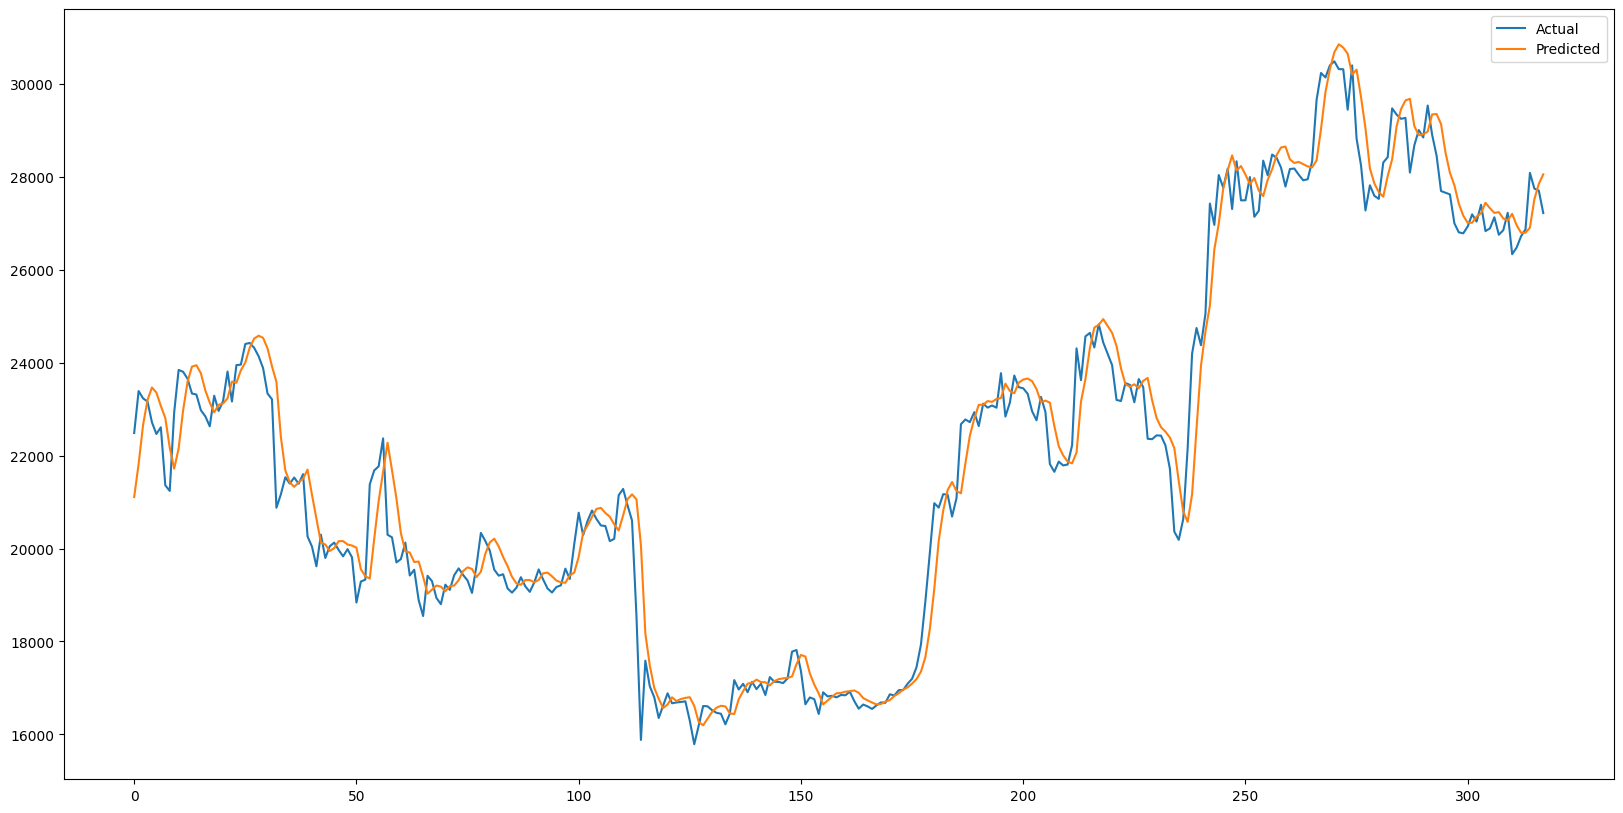

In [38]:
# Plotting the actual and predicted values
plt.figure(figsize = (20, 10))
plt.plot(test_7_results_unscaled['Actual'], label = 'Actual')
plt.plot(test_7_results_unscaled['Predicted'], label = 'Predicted')
plt.legend()

In [39]:
rmse_7 = np.sqrt(np.mean((test_7_results_unscaled['Actual'] - test_7_results_unscaled['Predicted'])**2))
mae_7 = np.mean(np.abs(test_7_results_unscaled['Actual'] - test_7_results_unscaled['Predicted']))
rmse_7, mae_7

(749.6932566289846, 508.4265397749607)

# 15 Day Look Back Window

In [40]:
x_15.shape, y_15.shape

((3164, 15, 1), (3164, 1))

In [41]:
X_15_train, y_15_train = x_15[:int(0.8*len(x_15))], y_15[:int(0.8*len(x_15))]
X_15_val, y_15_val = x_15[int(0.8*len(x_15)):int(0.9*len(x_15))], y_15[int(0.8*len(x_15)):int(0.9*len(x_15))]
X_15_test, y_15_test = x_15[int(0.9*len(x_15)):], y_15[int(0.9*len(x_15)):]
X_15_train.shape, y_15_train.shape, X_15_val.shape, y_15_val.shape, X_15_test.shape, y_15_test.shape

((2531, 15, 1), (2531, 1), (316, 15, 1), (316, 1), (317, 15, 1), (317, 1))

In [42]:
model_15 = Sequential()
model_15.add(InputLayer(input_shape = (15, 1)))
model_15.add(LSTM(64))
model_15.add(Dense(8, activation = 'relu'))
model_15.add(Dense(1, activation = 'linear'))

model_15.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
cp15 = ModelCheckpoint('models/lstm_15.h5', save_best_only = True)
model_15.compile(optimizer = Adam(learning_rate = 0.001), loss = MeanSquaredError(), metrics = [RootMeanSquaredError(), MeanAbsoluteError()])

In [44]:
model_15.fit(X_15_train, y_15_train, epochs = 200, validation_data = (X_15_val, y_15_val), callbacks = [cp15])

Epoch 1/200
80/80 [==============================] - 1s 5ms/step - loss: 0.0086 - root_mean_squared_error: 0.0928 - mean_absolute_error: 0.0415 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0834 - val_mean_absolute_error: 0.0705
Epoch 2/200
55/80 [===================>..........] - ETA: 0s - loss: 6.7386e-04 - root_mean_squared_error: 0.0260 - mean_absolute_error: 0.0143

/opt/miniconda3/envs/eth/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


80/80 [==============================] - 0s 3ms/step - loss: 6.0857e-04 - root_mean_squared_error: 0.0247 - mean_absolute_error: 0.0134 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0485 - val_mean_absolute_error: 0.0389
Epoch 3/200
80/80 [==============================] - 0s 3ms/step - loss: 4.9065e-04 - root_mean_squared_error: 0.0222 - mean_absolute_error: 0.0114 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0493 - val_mean_absolute_error: 0.0403
Epoch 4/200
80/80 [==============================] - 0s 3ms/step - loss: 4.1973e-04 - root_mean_squared_error: 0.0205 - mean_absolute_error: 0.0101 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0493 - val_mean_absolute_error: 0.0406
Epoch 5/200
80/80 [==============================] - 0s 3ms/step - loss: 3.8779e-04 - root_mean_squared_error: 0.0197 - mean_absolute_error: 0.0095 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0451 - val_mean_absolute_error: 0.0367
Epoch 6/200
80/80 [==============================] - 0s 

In [45]:
model_15 = load_model('models/lstm_15.h5')

In [46]:
test_15_predictions = model_15.predict(X_15_test)
test_15_results = pd.DataFrame({'Actual': y_15_test.flatten(), 'Predicted': test_15_predictions.flatten()})
test_15_results

10/10 [==============================] - 0s 1ms/step


,Actual,Predicted
0,0.344439,0.328142
1,0.342099,0.343964
2,0.341103,0.343936
3,0.334431,0.342348
4,0.330729,0.335845
...,...,...
312,0.396064,0.393714
313,0.414128,0.396387
314,0.409086,0.413142
315,0.408440,0.411165


In [47]:
# Creating a dataframe with the actual and predicted values without the scaling
test_15_results_unscaled = pd.DataFrame({'Actual': scaler.inverse_transform(y_15_test).flatten(), 'Predicted': scaler.inverse_transform(test_15_predictions).flatten()})

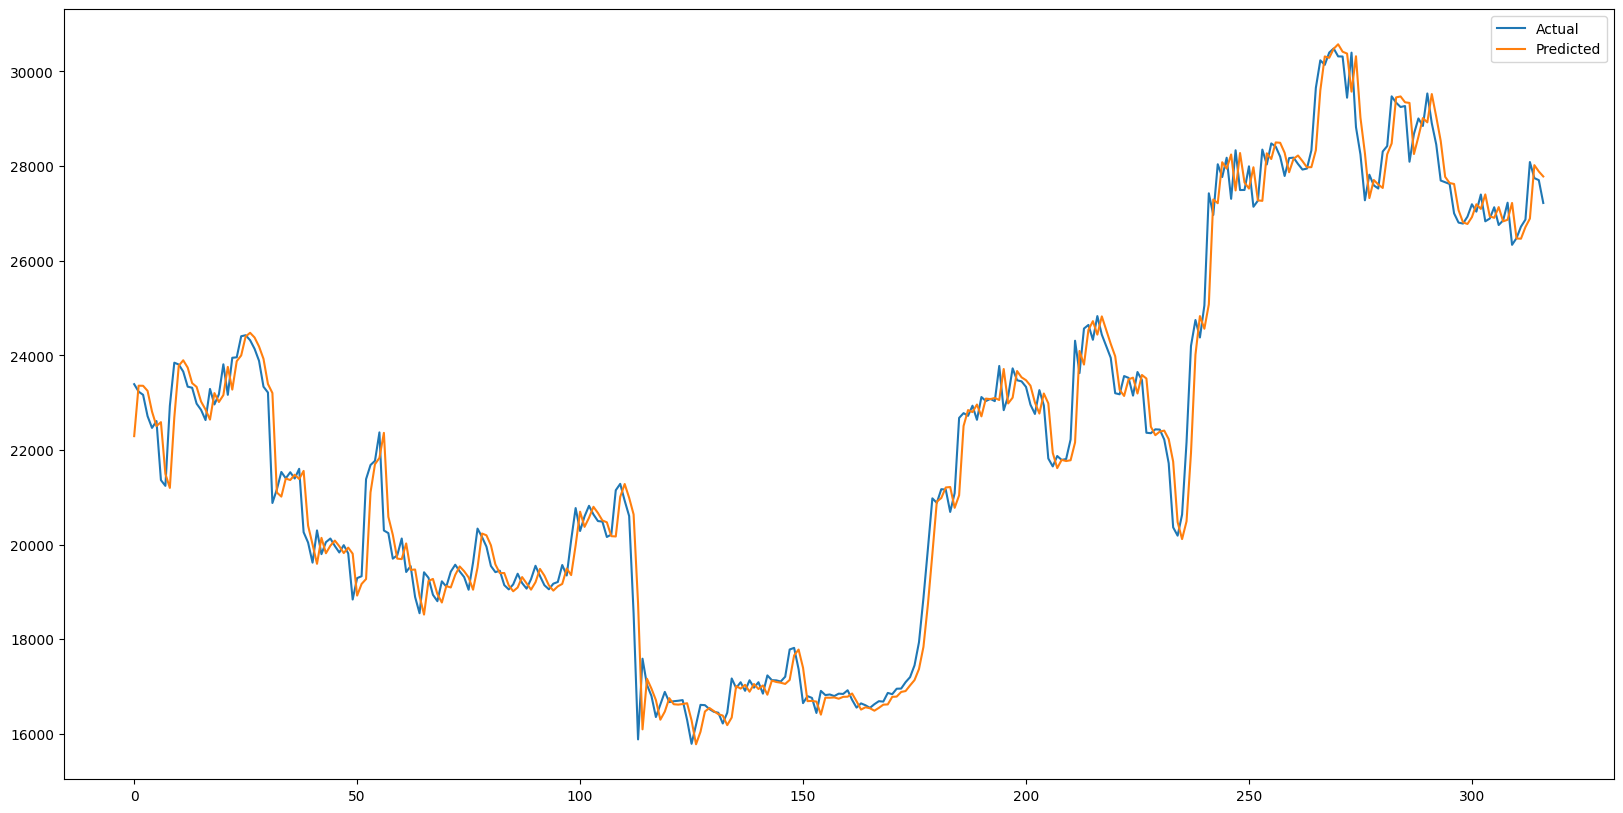

In [48]:
# Plotting the actual and predicted values
plt.figure(figsize = (20, 10))
plt.plot(test_15_results_unscaled['Actual'], label = 'Actual')
plt.plot(test_15_results_unscaled['Predicted'], label = 'Predicted')
plt.legend()

In [49]:
rmse_15 = np.sqrt(np.mean((test_15_results_unscaled['Actual'] - test_15_results_unscaled['Predicted'])**2))
mae_15 = np.mean(np.abs(test_15_results_unscaled['Actual'] - test_15_results_unscaled['Predicted']))
rmse_15, mae_15

(607.3212078589854, 404.6652670297713)

# 30 Day Look Back Window

In [50]:
x_30.shape, y_30.shape

((3149, 30, 1), (3149, 1))

In [51]:
X_30_train, y_30_train = x_30[:int(0.8*len(x_30))], y_30[:int(0.8*len(x_30))]
X_30_val, y_30_val = x_30[int(0.8*len(x_30)):int(0.9*len(x_30))], y_30[int(0.8*len(x_30)):int(0.9*len(x_30))]
X_30_test, y_30_test = x_30[int(0.9*len(x_30)):], y_30[int(0.9*len(x_30)):]
X_30_train.shape, y_30_train.shape, X_30_val.shape, y_30_val.shape, X_30_test.shape, y_30_test.shape

((2519, 30, 1), (2519, 1), (315, 30, 1), (315, 1), (315, 30, 1), (315, 1))

In [52]:
model_30 = Sequential()
model_30.add(InputLayer(input_shape = (30, 1)))
model_30.add(LSTM(64))
model_30.add(Dense(8, activation = 'relu'))
model_30.add(Dense(1, activation = 'linear'))

model_30.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
cp30 = ModelCheckpoint('models/lstm_30.h5', save_best_only = True)
model_30.compile(optimizer = Adam(learning_rate = 0.001), loss = MeanSquaredError(), metrics = [RootMeanSquaredError(), MeanAbsoluteError()])

In [54]:
model_30.fit(X_30_train, y_30_train, epochs = 200, validation_data = (X_30_val, y_30_val), callbacks = [cp30])

Epoch 1/200
79/79 [==============================] - 1s 10ms/step - loss: 0.0066 - root_mean_squared_error: 0.0813 - mean_absolute_error: 0.0399 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0565 - val_mean_absolute_error: 0.0461
Epoch 2/200
31/79 [==========>...................] - ETA: 0s - loss: 5.3224e-04 - root_mean_squared_error: 0.0231 - mean_absolute_error: 0.0110

/opt/miniconda3/envs/eth/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


79/79 [==============================] - 0s 6ms/step - loss: 5.0754e-04 - root_mean_squared_error: 0.0225 - mean_absolute_error: 0.0111 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0494 - val_mean_absolute_error: 0.0401
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 4.7685e-04 - root_mean_squared_error: 0.0218 - mean_absolute_error: 0.0102 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0458 - val_mean_absolute_error: 0.0364
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 4.3365e-04 - root_mean_squared_error: 0.0208 - mean_absolute_error: 0.0106 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0552 - val_mean_absolute_error: 0.0456
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 4.0531e-04 - root_mean_squared_error: 0.0201 - mean_absolute_error: 0.0105 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0406 - val_mean_absolute_error: 0.0318
Epoch 6/200
79/79 [==============================] - 0s 

In [55]:
model_30 = load_model('models/lstm_30.h5')

In [56]:
test_30_predictions = model_30.predict(X_30_test)
test_30_results = pd.DataFrame({'Actual': y_30_test.flatten(), 'Predicted': test_30_predictions.flatten()})
test_30_results

10/10 [==============================] - 0s 4ms/step


,Actual,Predicted
0,0.341103,0.344611
1,0.334431,0.342853
2,0.330729,0.336272
3,0.332861,0.331680
4,0.314349,0.332903
...,...,...
310,0.396064,0.394179
311,0.414128,0.396945
312,0.409086,0.413623
313,0.408440,0.411876


In [57]:
# Creating a dataframe with the actual and predicted values without the scaling
test_30_results_unscaled = pd.DataFrame({'Actual': scaler.inverse_transform(y_30_test).flatten(), 'Predicted': scaler.inverse_transform(test_30_predictions).flatten()})

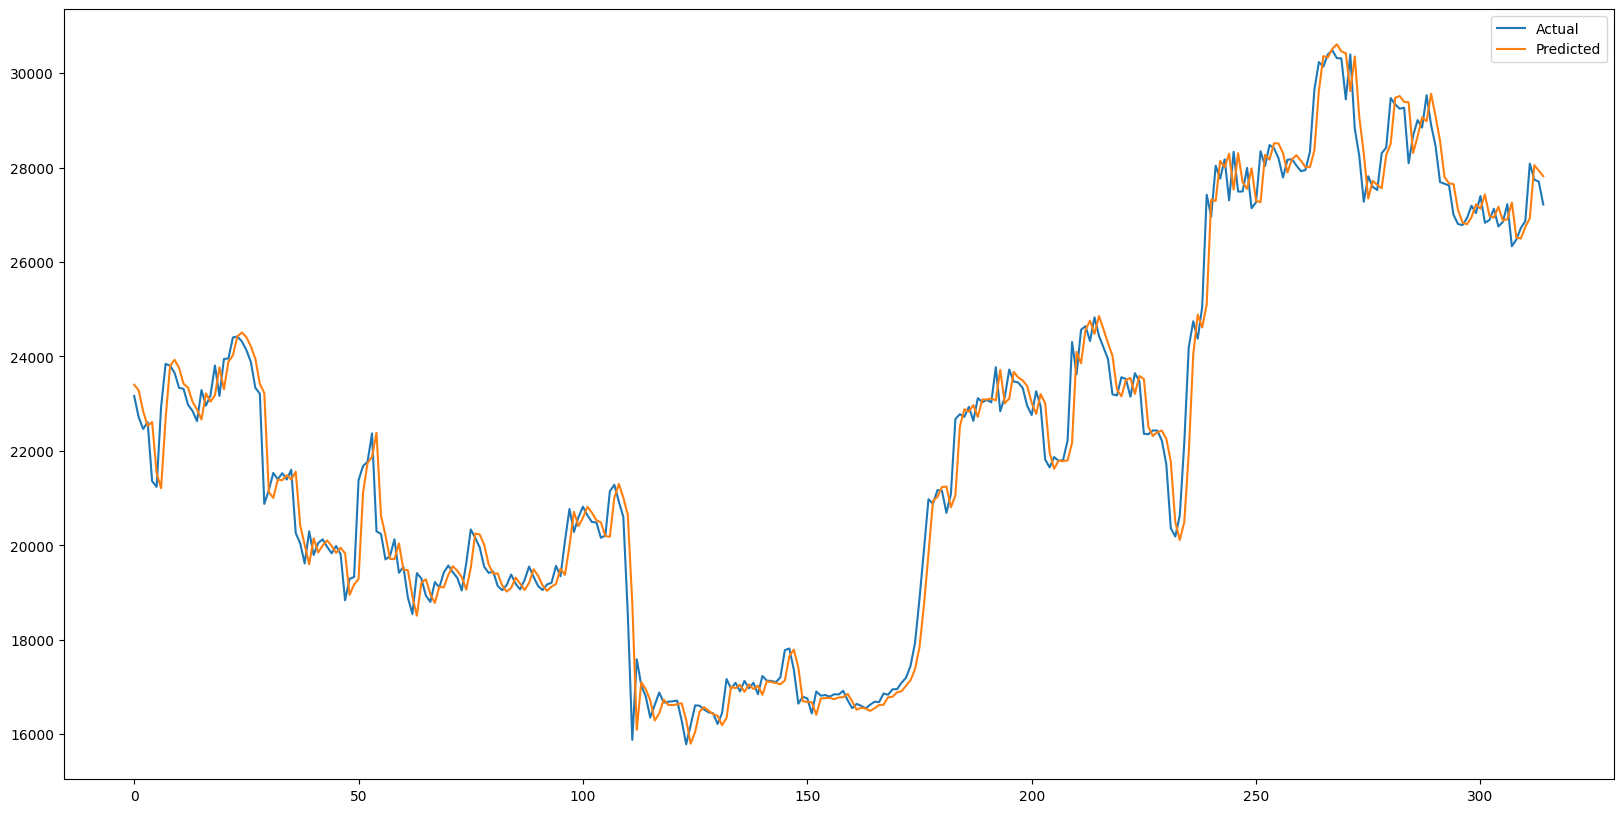

In [58]:
# Plotting the actual and predicted values
plt.figure(figsize = (20, 10))
plt.plot(test_30_results_unscaled['Actual'], label = 'Actual')
plt.plot(test_30_results_unscaled['Predicted'], label = 'Predicted')
plt.legend()

In [59]:
rmse_30 = np.sqrt(np.mean((test_30_results_unscaled['Actual'] - test_30_results_unscaled['Predicted'])**2))
mae_30 = np.mean(np.abs(test_30_results_unscaled['Actual'] - test_30_results_unscaled['Predicted']))
rmse_30, mae_30

(607.9922060051941, 406.6910466269842)

# 60 Day Look Back Window

In [60]:
x_60.shape, y_60.shape

((3119, 60, 1), (3119, 1))

In [61]:
X_60_train, y_60_train = x_60[:int(0.8*len(x_60))], y_60[:int(0.8*len(x_60))]
X_60_val, y_60_val = x_60[int(0.8*len(x_60)):int(0.9*len(x_60))], y_60[int(0.8*len(x_60)):int(0.9*len(x_60))]
X_60_test, y_60_test = x_60[int(0.9*len(x_60)):], y_60[int(0.9*len(x_60)):]
X_60_train.shape, y_60_train.shape, X_60_val.shape, y_60_val.shape, X_60_test.shape, y_60_test.shape

((2495, 60, 1), (2495, 1), (312, 60, 1), (312, 1), (312, 60, 1), (312, 1))

In [62]:
model_60 = Sequential()
model_60.add(InputLayer(input_shape = (60, 1)))
model_60.add(LSTM(64))
model_60.add(Dense(8, activation = 'relu'))
model_60.add(Dense(1, activation = 'linear'))

model_60.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                16896     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
cp60 = ModelCheckpoint('models/lstm_60.h5', save_best_only = True)
model_60.compile(optimizer = Adam(learning_rate = 0.001), loss = MeanSquaredError(), metrics = [RootMeanSquaredError(), MeanAbsoluteError()])

In [64]:
model_60.fit(X_60_train, y_60_train, epochs = 200, validation_data = (X_60_val, y_60_val), callbacks = [cp60])

Epoch 1/200
78/78 [==============================] - 2s 14ms/step - loss: 0.0108 - root_mean_squared_error: 0.1040 - mean_absolute_error: 0.0491 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0676 - val_mean_absolute_error: 0.0570
Epoch 2/200
16/78 [=====>........................] - ETA: 0s - loss: 7.0538e-04 - root_mean_squared_error: 0.0266 - mean_absolute_error: 0.0138

/opt/miniconda3/envs/eth/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


78/78 [==============================] - 1s 11ms/step - loss: 6.2045e-04 - root_mean_squared_error: 0.0249 - mean_absolute_error: 0.0128 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0541 - val_mean_absolute_error: 0.0402
Epoch 3/200
78/78 [==============================] - 1s 11ms/step - loss: 5.2639e-04 - root_mean_squared_error: 0.0229 - mean_absolute_error: 0.0114 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0561 - val_mean_absolute_error: 0.0463
Epoch 4/200
78/78 [==============================] - 1s 13ms/step - loss: 4.4038e-04 - root_mean_squared_error: 0.0210 - mean_absolute_error: 0.0109 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0461 - val_mean_absolute_error: 0.0357
Epoch 5/200
78/78 [==============================] - 1s 12ms/step - loss: 4.2675e-04 - root_mean_squared_error: 0.0207 - mean_absolute_error: 0.0107 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0478 - val_mean_absolute_error: 0.0385
Epoch 6/200
78/78 [==============================] -

In [65]:
model_60 = load_model('models/lstm_60.h5')

In [66]:
test_60_predictions = model_60.predict(X_60_test)
test_60_results = pd.DataFrame({'Actual': y_60_test.flatten(), 'Predicted': test_60_predictions.flatten()})

10/10 [==============================] - 0s 4ms/step


In [67]:
# Creating a dataframe with the actual and predicted values without the scaling
test_60_results_unscaled = pd.DataFrame({'Actual': scaler.inverse_transform(y_60_test).flatten(), 'Predicted': scaler.inverse_transform(test_60_predictions).flatten()})
test_60_results_unscaled

,Actual,Predicted
0,22609.164062,22615.873047
1,21361.701172,22696.539062
2,21239.753906,21655.949219
3,22930.548828,21328.630859
4,23843.886719,22735.183594
...,...,...
307,26868.353516,26814.115234
308,28085.646484,26997.664062
309,27745.884766,28095.605469
310,27702.349609,28003.982422


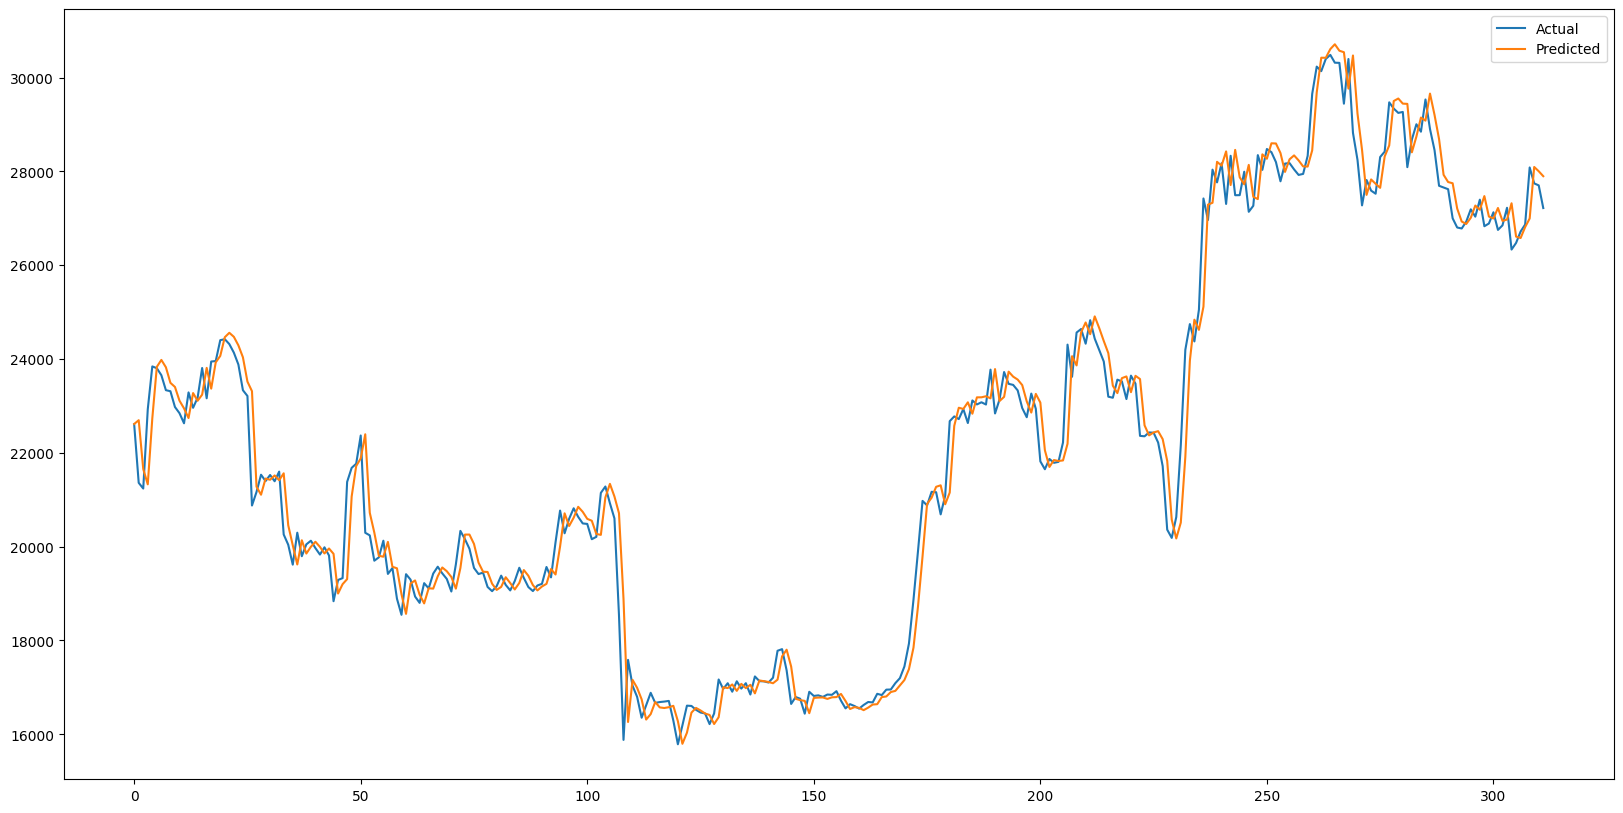

In [68]:
# Plotting the actual and predicted values
plt.figure(figsize = (20, 10))
plt.plot(test_60_results_unscaled['Actual'], label = 'Actual')
plt.plot(test_60_results_unscaled['Predicted'], label = 'Predicted')
plt.legend()

In [69]:
rmse_60 = np.sqrt(np.mean((test_60_results_unscaled['Actual'] - test_60_results_unscaled['Predicted'])**2))
mae_60 = np.mean(np.abs(test_60_results_unscaled['Actual'] - test_60_results_unscaled['Predicted']))
rmse_60, mae_60

(619.6244940189937, 418.37748522636224)

# Comparing the models 

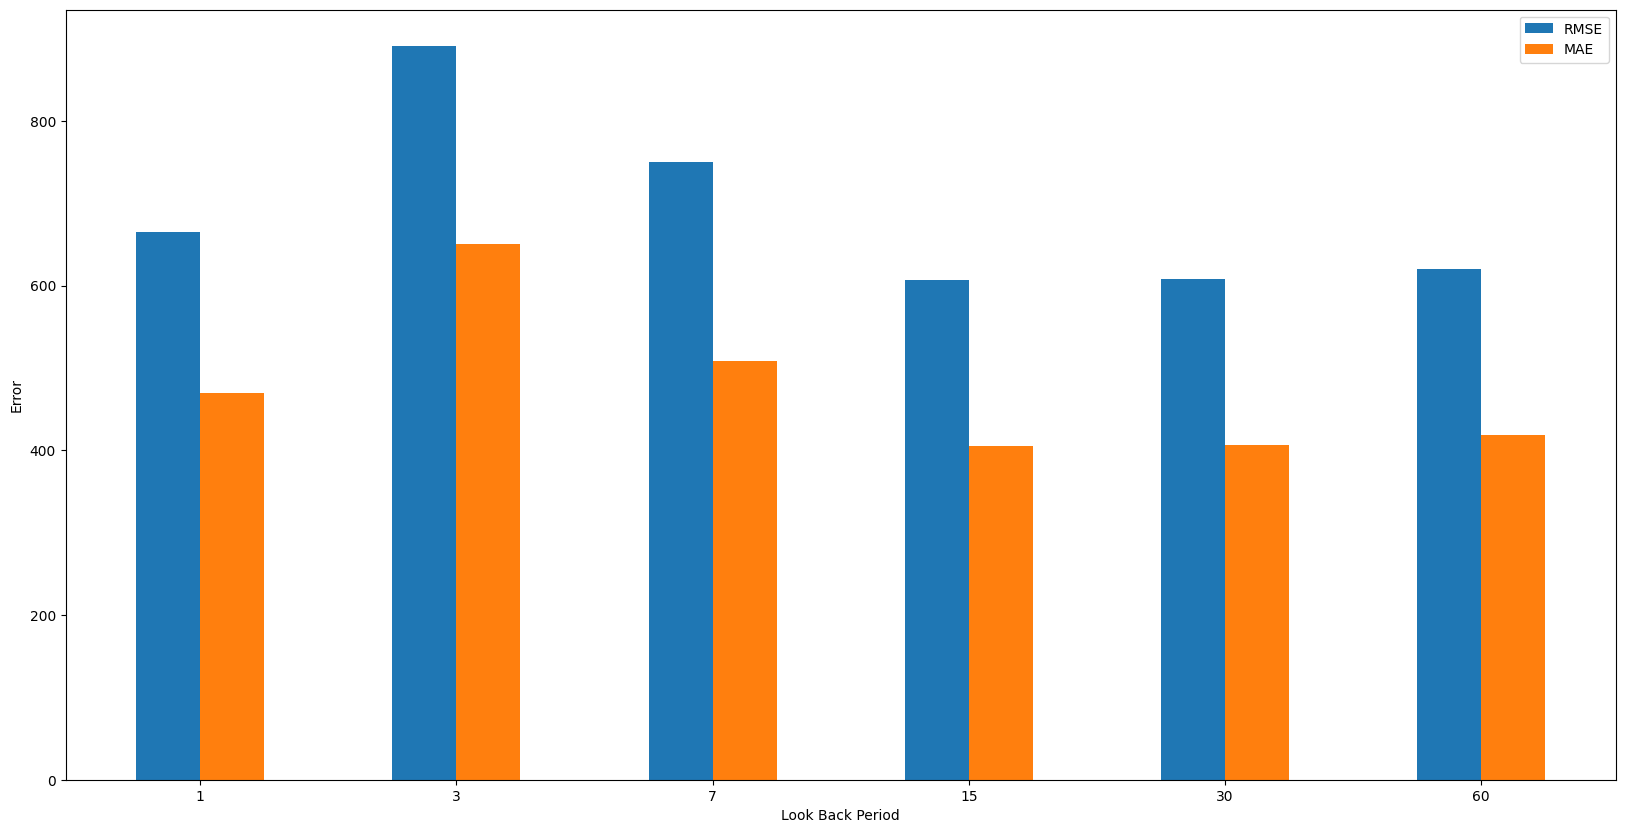

In [70]:
# Plotting in a bar chart, the RMSE and MAE for each look back period. The two metrics are plotted side by side for each look back period
plt.figure(figsize = (20, 10))
plt.bar(np.arange(6), [rmse, rmse_3, rmse_7, rmse_15, rmse_30, rmse_60], width = 0.25, label = 'RMSE')
plt.bar(np.arange(6) + 0.25, [mae, mae_3, mae_7, mae_15, mae_30, mae_60], width = 0.25, label = 'MAE')
plt.xticks(np.arange(6) + 0.125, ['1', '3', '7', '15', '30', '60'])
plt.xlabel('Look Back Period')
plt.ylabel('Error')
plt.legend()